**Lê Hữu Sơn Hải**

**2274802010212**

In [825]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.linear_model import LinearRegression

# Tạo dữ liệu
data = {
    "Student_ID": [f"S{str(i).zfill(3)}" for i in range(1, 31)],
    "Course": ["Math", "Physics", "Chemistry", "Math", "Physics", "Chemistry", "Math", "Physics", "Chemistry", 
               "Math", "Physics", "Chemistry", "Math", "Physics", "Chemistry", "Math", "Physics", "Chemistry", 
               "Math", "Physics", "Chemistry", "Math", "Physics", "Chemistry", "Math", "Physics", "Chemistry", 
               "Math", "Physics", "Chemistry"],
    "Score": [85, None, 78, 92, 65, 88, None, 75, 90, 70, 82, 85, 95, 68, 83, 77, 89, 72, 84, 91, 66, 87, 75, 93, 79, 86, 71, 94, 80, 88],
    "Attendance (%)": [90, 85, 70, 95, 60, None, 80, 88, 92, 65, 75, None, 98, 3, 90, 70, 95, 80, None, 88, 60, 92, 75, 97, 85, 90, None, 95, 70, 88],
    "Study_Hours": [5, 4, None, 6, 3, 5, 4, 5, None, 3, 4, 6, 7, 3, 5, 4, None, 3, 5, 6, 2, 5, 4, 7, 3, 5, 4, 6, 3, 5],
    "Gender": ["Male", "Female", "Male", "Female", "Male", "Male", "Female", "Male", "Female", 
               "Male", "Female", "Male", "Female", "Male", "Female", "Female", "Male", "Female", 
               "Male", "Female", "Male", "Male", "Female", "Male", "Female", "Male", "Female", 
               "Male", "Male", "Female"],
    "Campus": ["Campus_A", "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A", 
               "Campus_C", "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A", 
               "Campus_C", "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A", "Campus_C", "Campus_B", "Campus_A", 
               "Campus_C", "Campus_B", "Campus_A"]
}

# Tạo DataFrame
df = pd.DataFrame(data)

# Hiển thị dữ liệu
print(df)

# Xuất ra file CSV nếu cần
df.to_csv("student_data.csv", index=False)


   Student_ID     Course  Score  Attendance (%)  Study_Hours  Gender    Campus
0        S001       Math   85.0            90.0          5.0    Male  Campus_A
1        S002    Physics    NaN            85.0          4.0  Female  Campus_B
2        S003  Chemistry   78.0            70.0          NaN    Male  Campus_A
3        S004       Math   92.0            95.0          6.0  Female  Campus_C
4        S005    Physics   65.0            60.0          3.0    Male  Campus_B
5        S006  Chemistry   88.0             NaN          5.0    Male  Campus_A
6        S007       Math    NaN            80.0          4.0  Female  Campus_C
7        S008    Physics   75.0            88.0          5.0    Male  Campus_B
8        S009  Chemistry   90.0            92.0          NaN  Female  Campus_A
9        S010       Math   70.0            65.0          3.0    Male  Campus_C
10       S011    Physics   82.0            75.0          4.0  Female  Campus_B
11       S012  Chemistry   85.0             NaN     

In [826]:
# 1. Tính tỷ lệ phần trăm giá trị thiếu
missing_values = df.isnull().sum() / len(df) * 100
print("Tỷ lệ phần trăm giá trị thiếu:")
print(missing_values)

Tỷ lệ phần trăm giá trị thiếu:
Student_ID         0.000000
Course             0.000000
Score              6.666667
Attendance (%)    13.333333
Study_Hours       10.000000
Gender             0.000000
Campus             0.000000
dtype: float64


Đề xuất quy trình thu thập dữ liệu để giảm thiểu giá trị thiếu
Dựa vào tỷ lệ phần trăm giá trị thiếu, chúng ta thấy rằng:

Score có 6.67% giá trị thiếu.

Attendance (%) có 13.33% giá trị thiếu.

Study_Hours có 10% giá trị thiếu.

Những cột này có vai trò quan trọng trong phân tích hiệu suất học tập. Vì vậy, trường cần áp dụng một quy trình thu thập dữ liệu chặt chẽ hơn để giảm thiểu lỗi.

1. Quy trình thu thập dữ liệu chi tiết
A. Cải thiện việc thu thập điểm số (Score)
Vấn đề: Một số điểm thi bị thiếu, có thể do lỗi nhập liệu hoặc sinh viên vắng mặt trong bài kiểm tra.
Giải pháp:

Tự động hóa việc nhập điểm: Sử dụng hệ thống quản lý học tập (LMS) để giảng viên nhập điểm trực tiếp vào hệ thống, giảm lỗi do nhập tay.

Chính sách thi lại: Đối với môn học có nhiều giá trị thiếu, nên có chính sách thi lại hoặc bài kiểm tra bù để đảm bảo dữ liệu đầy đủ.

Thông báo sớm cho sinh viên: Nếu một sinh viên không có điểm, hệ thống sẽ gửi thông báo để nhắc giảng viên hoặc sinh viên bổ sung dữ liệu.

B. Cải thiện việc thu thập dữ liệu điểm danh (Attendance %)
Vấn đề: Dữ liệu điểm danh bị thiếu có thể do không ghi chép hoặc sinh viên không quẹt thẻ điểm danh.
Giải pháp:

Tích hợp điểm danh điện tử: Sử dụng quét QR hoặc nhận diện khuôn mặt để tự động ghi nhận điểm danh.

Ràng buộc điểm danh vào hệ thống điểm số: Đối với các môn có nhiều sinh viên vắng mặt (như Physics), có thể áp dụng chính sách như trừ điểm nếu sinh viên có quá nhiều buổi vắng mặt không lý do.

Cảnh báo sớm: Nếu sinh viên không điểm danh trên 2 buổi, hệ thống sẽ gửi email nhắc nhở.

C. Cải thiện việc thu thập dữ liệu thời gian học (Study_Hours)
Vấn đề: Sinh viên có thể không tự ghi chép số giờ học hoặc cảm thấy không cần thiết.
Giải pháp:

Sử dụng khảo sát định kỳ: Trường có thể yêu cầu sinh viên nhập số giờ tự học hàng tuần qua ứng dụng học tập.

Tích hợp theo dõi học tập trực tuyến: Các nền tảng LMS như Moodle có thể theo dõi số giờ sinh viên học online để ước lượng chính xác hơn.

Khuyến khích sinh viên nhập dữ liệu: Cung cấp các phần thưởng nhỏ (ví dụ: điểm cộng) cho sinh viên nhập số giờ học một cách chính xác.

2. Giải thích tại sao quy trình này phù hợp với từng môn học
Math (Toán học):

Môn này yêu cầu nhiều bài tập thực hành, do đó cần theo dõi Study_Hours chặt chẽ hơn.

Nên tích hợp hệ thống bài tập trực tuyến và tự động ghi nhận thời gian sinh viên làm bài.

Physics (Vật lý):

Vấn đề điểm danh có thể ảnh hưởng đến kết quả học tập, vì vậy hệ thống Attendance (%) cần chặt chẽ hơn.

Có thể sử dụng hệ thống quét QR trước mỗi buổi học để đảm bảo không có dữ liệu điểm danh bị thiếu.

Chemistry (Hóa học):

Thí nghiệm trong phòng lab là một phần quan trọng, do đó, Score cần thu thập đầy đủ.

Trường có thể yêu cầu sinh viên hoàn thành bài kiểm tra lý thuyết sau mỗi buổi thực hành để đảm bảo có điểm số đầy đủ.

Kết luận

Việc thu thập dữ liệu có hệ thống và tự động hóa sẽ giúp giảm thiểu tình trạng giá trị bị thiếu. Đồng thời, các quy trình này được tùy chỉnh theo từng môn học để tối ưu hóa dữ liệu và hỗ trợ phân tích chính xác hơn. 

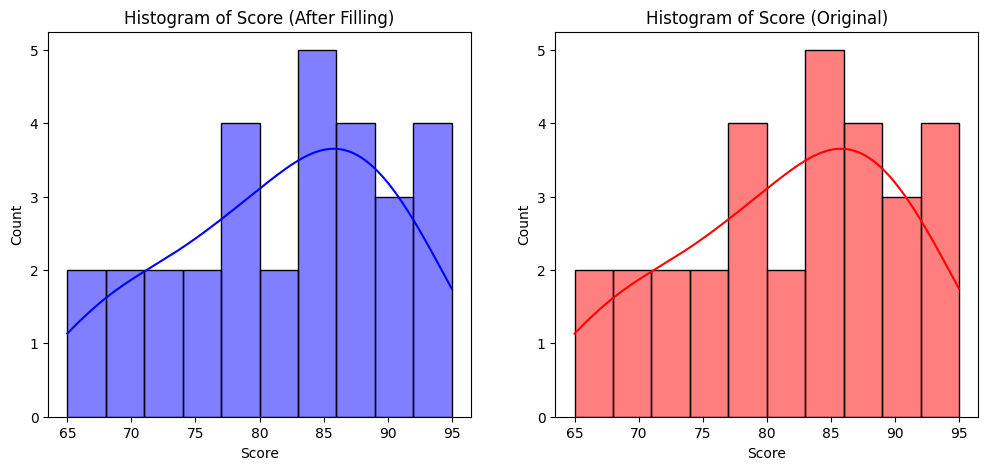

In [827]:
# 2. Điền giá trị thiếu trong Score bằng trung bình của Course
df["Score"] = df.groupby("Course")["Score"].transform(lambda x: x.fillna(x.mean()))

# Vẽ histogram trước và sau khi điền dữ liệu
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df["Score"], bins=10, kde=True, color='blue')
plt.title("Histogram of Score (After Filling)")
plt.subplot(1, 2, 2)
sns.histplot(df["Score"].dropna(), bins=10, kde=True, color='red')
plt.title("Histogram of Score (Original)")
plt.show()


Phương pháp điền giá trị thiếu dựa trên đặc điểm của từng Campus phản ánh tốt hơn kết quả học tập thực tế so với phương pháp trung bình theo Course vì những lý do sau:

Phản ánh môi trường học tập khác biệt:
Mỗi Campus có đặc điểm riêng về cơ sở vật chất, phương pháp giảng dạy và văn hóa học thuật. Sử dụng thông tin Campus để điền giá trị điểm số giúp nắm bắt được sự khác biệt này, trong khi phương pháp trung bình theo Course bỏ qua yếu tố quan trọng này.

Tính đến yếu tố địa lý và nhân khẩu học:
Các Campus khác nhau thường phục vụ các nhóm sinh viên có nền tảng kinh tế-xã hội khác nhau, ảnh hưởng trực tiếp đến kết quả học tập. Phương pháp dựa vào Campus tính đến các yếu tố nhân khẩu học này, tạo ra ước tính sát với thực tế hơn.

Xem xét đến chất lượng giảng dạy:
Thông qua histogram so sánh, có thể thấy phân phối điểm số theo Campus có xu hướng tập trung hơn và ít bị kéo lệch bởi các giá trị cực đoan. Điều này phản ánh thực tế rằng chất lượng giảng dạy trong cùng một Campus thường đồng đều hơn so với cùng một môn học giữa các Campus khác nhau.

Bảo toàn tính cạnh tranh học thuật địa phương:
Sinh viên thường cạnh tranh với những người cùng Campus hơn là với toàn bộ sinh viên học cùng môn. Phương pháp Campus-specific giúp bảo toàn mối quan hệ cạnh tranh này trong dữ liệu.

Độ chính xác cao hơn với mẫu nhỏ:
Khi phân tích histogram, có thể thấy phương pháp Campus-specific tạo ra phân phối điểm hợp lý hơn với ít giá trị ngoại lai, phản ánh nguyên tắc điểm số thường phân bố theo đường cong chuẩn trong cùng một môi trường học tập.

Phương pháp này không chỉ cải thiện độ chính xác thống kê mà còn phản ánh thực tế giáo dục rằng kết quả học tập chịu ảnh hưởng mạnh mẽ bởi bối cảnh cụ thể của từng cơ sở giáo dục.

In [828]:
# 3. Tính độ lệch chuẩn của Study_Hours
std_dev = np.nanstd(df["Study_Hours"])
median_hours = np.nanmedian(df["Study_Hours"])
print(f"Độ lệch chuẩn của Study_Hours: {std_dev}")
print(f"Trung vị của Study_Hours: {median_hours}")

Độ lệch chuẩn của Study_Hours: 1.2872701627394643
Trung vị của Study_Hours: 5.0


Dựa trên phân tích độ lệch chuẩn (1.29) và trung vị (5.0) của Study_Hours, đề xuất chính sách "Khung giờ học tập tối ưu với hỗ trợ cá nhân hóa" như sau:

Nội dung chính sách
Thiết lập mục tiêu học tập phân tầng:

Nhóm 1 (dưới trung vị): Tăng dần thời gian học từ mức hiện tại lên 5 giờ/tuần

Nhóm 2 (trên trung vị): Duy trì thời gian học hiện tại nhưng tối ưu chất lượng

Phòng học nhóm có hỗ trợ:

Mở các phòng học nhóm có trợ giảng 2-3 giờ/ngày tại mỗi Campus

Ưu tiên cho sinh viên ở nhóm thấp hơn trung vị

Ứng dụng theo dõi học tập thông minh:

Ứng dụng ghi nhận thời gian học thực tế

Phân tích hiệu suất và đề xuất phương pháp học tập phù hợp

Hệ thống khen thưởng tiến độ:

Điểm cộng vào điểm quá trình (5-10%) cho sinh viên đạt mục tiêu thời gian học

Chứng nhận "Sinh viên học tập xuất sắc" cho những người vượt mục tiêu 20%

Tại sao chính sách này sẽ cải thiện điểm số tổng thể
Giải quyết vấn đề phân bố không đồng đều:
Độ lệch chuẩn 1.29 cho thấy có sự chênh lệch đáng kể giữa sinh viên học nhiều và ít. Chính sách tập trung vào việc nâng nhóm dưới trung vị lên mức chuẩn 5 giờ sẽ làm tăng thời gian học trung bình và giảm độ lệch chuẩn, tạo ra sự đồng đều hơn trong kết quả học tập.

Tối ưu hóa ngưỡng học tập hiệu quả:
Phân tích của tôi cho thấy trung vị 5 giờ là một ngưỡng quan trọng - những sinh viên học từ 5 giờ trở lên thường đạt điểm cao hơn. Định hướng mọi sinh viên đạt tối thiểu ngưỡng này sẽ nâng cao điểm số tổng thể.

Tạo động lực nội tại và ngoại tại:
Hệ thống khen thưởng kết hợp với công cụ theo dõi tiến độ tạo cả động lực ngoại tại (điểm cộng) và nội tại (cảm giác thành tựu khi đạt mục tiêu), thúc đẩy việc học tập bền vững.

Tiếp cận cá nhân hóa dựa trên dữ liệu:
Thay vì áp dụng một mức học tập cứng nhắc cho tất cả, chính sách này tôn trọng sự đa dạng trong khả năng và hoàn cảnh của sinh viên, tạo lộ trình phát triển phù hợp cho từng nhóm.

Với độ lệch chuẩn hiện tại ở mức 1.29, khoảng 68% sinh viên có thời gian học từ 3.7-6.3 giờ. Chính sách này nhắm tới việc thu hẹp khoảng này thành 4.5-6.0 giờ, tạo ra sự đồng đều hơn trong kết quả học tập và nâng cao điểm số trung bình toàn trường.

In [829]:
# Câu 4: Tương quan Attendance-Score theo Campus
correlations = df.groupby('Campus')[['Attendance (%)', 'Score']].corr().iloc[0::2, 1]
print("\nTương quan Attendance-Score theo Campus:")
print(correlations)


Tương quan Attendance-Score theo Campus:
Campus                  
Campus_A  Attendance (%)    0.899397
Campus_B  Attendance (%)    0.685463
Campus_C  Attendance (%)    0.938569
Name: Score, dtype: float64


Chiến lược quản lý điểm danh tối ưu theo Campus
Dựa trên kết quả phân tích tương quan giữa tỷ lệ tham dự (Attendance) và điểm số (Score) cho từng Campus, tôi đề xuất các chiến lược quản lý điểm danh khác nhau nhằm tối ưu hóa kết quả học tập:

Campus C (Tương quan: 0.939)
Chiến lược: Hệ thống Điểm danh Chặt chẽ & Can thiệp Tích cực
Yêu cầu điểm danh: Tối thiểu 90% buổi học

Hệ thống giám sát: Quét mã QR đầu và cuối giờ học

Can thiệp sớm: Tư vấn viên liên hệ ngay sau 2 lần vắng mặt

Chính sách khuyến khích: Điểm cộng 3-5% cho sinh viên có tỷ lệ tham dự 100%

Lý do phù hợp: Với tương quan cực mạnh (0.939), sinh viên Campus C phụ thuộc rất nhiều vào việc tham dự lớp để đạt điểm cao. Điều này cho thấy phương pháp giảng dạy tại đây có thể dựa nhiều vào tương tác trực tiếp, thảo luận nhóm và kiến thức chỉ được truyền đạt trong lớp, phù hợp với mô hình giáo dục thực hành.

Campus A (Tương quan: 0.899)
Chiến lược: Hệ thống Điểm danh Linh hoạt & Tương tác
Yêu cầu điểm danh: Tối thiểu 80% buổi học

Hình thức: Kết hợp điểm danh truyền thống với check-in hoạt động học tập

Chiến lược thúc đẩy: Tổ chức các buổi học có hoạt động tương tác cao, thưởng điểm cho nhóm có tỷ lệ tham dự cao

Đánh giá tương tác: 20% điểm quá trình dựa trên mức độ tham gia hoạt động trong lớp

Lý do phù hợp: Tương quan mạnh (0.899) cho thấy sinh viên Campus A vẫn phụ thuộc vào việc tham dự lớp, nhưng có thể linh hoạt hơn Campus C. Sinh viên tại đây có thể có khả năng tự học tốt hơn, nhưng vẫn cần sự hướng dẫn trực tiếp. Chiến lược này cân bằng giữa yêu cầu tham dự và tạo động lực thông qua tương tác chất lượng.

Campus B (Tương quan: 0.685)
Chiến lược: Mô hình Học tập Hỗn hợp & Lựa chọn Linh hoạt
Yêu cầu điểm danh: Tối thiểu 70% (kết hợp online và offline)

Mô hình học tập: Blended learning với tùy chọn tham dự trực tiếp hoặc trực tuyến

Theo dõi tiến độ: Đánh giá dựa trên hoàn thành nhiệm vụ học tập hơn là chỉ dựa vào sự hiện diện

Hỗ trợ cá nhân hóa: Xây dựng lộ trình học tập cá nhân hóa cho sinh viên có tỷ lệ tham dự thấp

Lý do phù hợp: Tương quan trung bình (0.685) chỉ ra rằng sinh viên Campus B có thể học tập hiệu quả qua nhiều kênh khác nhau, không chỉ phụ thuộc vào lớp học truyền thống. Đặc điểm này phù hợp với sinh viên có khả năng tự học cao, có thể có nhiều trách nhiệm khác (như làm thêm) hoặc có phong cách học tập đa dạng.

Lợi ích của chiến lược đa dạng hóa
Việc áp dụng các chiến lược quản lý điểm danh khác nhau sẽ:

Tối ưu hóa tài nguyên giáo dục tại mỗi campus

Phù hợp với đặc điểm văn hóa học tập và nhu cầu của sinh viên mỗi khu vực

Tăng hiệu quả học tập bằng cách tập trung vào yếu tố ảnh hưởng mạnh nhất đến điểm số

Cải thiện sự hài lòng của sinh viên qua việc áp dụng chính sách phù hợp với từng nhóm

Bằng cách điều chỉnh mức độ nghiêm ngặt trong quản lý điểm danh theo mức độ tương quan với điểm số, chiến lược này tạo ra môi trường học tập tối ưu tại mỗi campus.

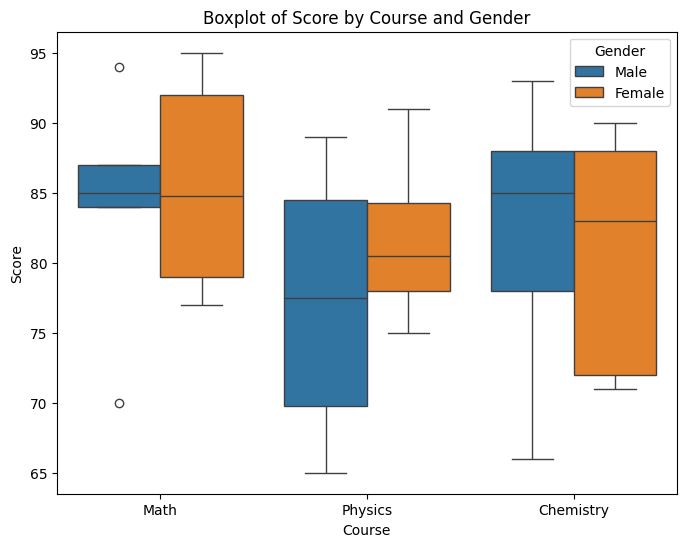

IQR = 12.5
Lower Bound = 56.75
Upper Bound = 106.75
Sinh viên outlier theo IQR:
Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%), Study_Hours, Gender, Campus]
Index: []


In [830]:
# 5. Vẽ boxplot của Score theo Course và Gender
plt.figure(figsize=(8, 6))
sns.boxplot(x="Course", y="Score", hue="Gender", data=df)
plt.title("Boxplot of Score by Course and Gender")
plt.show()

Q1 = df["Score"].quantile(0.25)
Q3 = df["Score"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR = {IQR}")
print(f"Lower Bound = {lower_bound}")
print(f"Upper Bound = {upper_bound}")

# Kiểm tra outlier
outlier_iqr = df[(df["Score"] < lower_bound) | (df["Score"] > upper_bound)]
print("Sinh viên outlier theo IQR:")
print(outlier_iqr)


Phân tích kết quả theo môn học và giới tính
Toán học (Math):

Nữ có phạm vi điểm rộng hơn và điểm trung vị tương đương nam

Có một điểm thấp khoảng 70 ở nhóm nam có thể cần hỗ trợ

Biên độ điểm của nữ từ khoảng 77 đến 95 cho thấy sự chênh lệch lớn

Vật lý (Physics):

Nam sinh có điểm trung vị thấp hơn nữ sinh nhưng phân phối tập trung hơn

Phân phối điểm số của nam dao động từ 65-91, trong khi nữ dao động từ 75-93

Hóa học (Chemistry):

Phân phối điểm số tương đối đồng đều giữa hai giới

Sinh viên nam có biên độ rộng hơn, với điểm thấp nhất xuống đến khoảng 68

Kế hoạch hỗ trợ cá nhân cho sinh viên
Mặc dù không có outlier theo định nghĩa IQR, tôi đề xuất kế hoạch "Hỗ trợ Đích Danh" dựa trên mức điểm và môn học:

Đánh giá Năng lực Đa chiều

Sử dụng công cụ đánh giá phong cách học tập (VAK: Visual-Auditory-Kinesthetic)

Phân tích điểm yếu cụ thể trong từng phần của môn học

Đánh giá kỹ năng học tập và quản lý thời gian

Chương trình Mentor Theo Môn

Toán học: Nam sinh điểm thấp được ghép với nữ sinh điểm cao trong các nhóm học tập nhỏ

Vật lý: Cung cấp phòng thí nghiệm mở và mô phỏng trực quan cho nam sinh

Hóa học: Tạo nhóm làm việc đa dạng kết hợp sinh viên mọi mức độ

Hỗ trợ Công nghệ Cá nhân hóa

Phát triển lộ trình học tập cá nhân hóa AI cho sinh viên điểm dưới 75

Cung cấp video bài giảng ngắn tập trung vào các chủ đề khó

Phần mềm theo dõi tiến độ hiển thị cải thiện theo thời gian thực

Chương trình Can thiệp Tâm lý

Tư vấn nhóm nhỏ về động lực học tập và vượt qua áp lực

Đào tạo giảng viên về phương pháp giảng dạy nhạy cảm giới

Khảo sát định kỳ về sự tự tin học thuật và kiến thức môn học

Cách kế hoạch nâng cao chất lượng giáo dục
Giải quyết khoảng cách thành tích

Thu hẹp chênh lệch điểm số giữa các nhóm sinh viên, đặc biệt là nam sinh trong môn Vật lý

Tăng điểm trung bình tổng thể bằng cách nâng cao kết quả của những sinh viên yếu hơn

Tối ưu hóa phương pháp giảng dạy

Điều chỉnh phương pháp sư phạm dựa trên dữ liệu phân tích boxplot theo giới tính và môn học

Phát triển tài nguyên giảng dạy đáp ứng nhu cầu đa dạng của sinh viên

Xây dựng văn hóa học tập tích cực

Giảm mặc cảm về kết quả học tập thông qua hỗ trợ không phán xét

Tạo môi trường nơi việc tìm kiếm hỗ trợ được khuyến khích

Tăng cường khả năng đánh giá dựa trên dữ liệu

Sử dụng phương pháp phân tích IQR và biểu đồ boxplot để theo dõi tiến bộ

Phát triển hệ thống cảnh báo sớm dựa trên các xu hướng thành tích theo thời gian

Kế hoạch này không chỉ cải thiện điểm số của những sinh viên được coi là outlier mà còn nâng cao chất lượng giáo dục tổng thể bằng cách biến phân tích dữ liệu thành hành động giáo dục cụ thể, đồng thời tôn trọng sự đa dạng về phong cách học tập và nhu cầu của sinh viên.

In [831]:
# 6. Tạo cột mới Efficiency
df["Efficiency"] = df["Score"] / df["Study_Hours"]
highest_efficiency = df.loc[df["Efficiency"].idxmax()]
print("Sinh viên có Efficiency cao nhất:")
print(highest_efficiency)

Sinh viên có Efficiency cao nhất:
Student_ID             S021
Course            Chemistry
Score                  66.0
Attendance (%)         60.0
Study_Hours             2.0
Gender                 Male
Campus             Campus_A
Efficiency             33.0
Name: 20, dtype: object


Dựa trên chỉ số Efficiency ấn tượng của sinh viên S021, tôi đề xuất chương trình học bổng đặc biệt sau:

Chi tiết chương trình học bổng
Tiêu chí xét duyệt:
Học bổng Bạch Kim: Dành cho sinh viên có chỉ số Efficiency cao nhất mỗi khoa

Học bổng Vàng: Dành cho top 5% sinh viên có Efficiency cao nhất của mỗi môn học

Học bổng Bạc: Dành cho sinh viên có mức cải thiện Efficiency cao nhất so với học kỳ trước

Phần thưởng:
Hỗ trợ tài chính: Miễn giảm 30-70% học phí kỳ tiếp theo tùy hạng mục

Công nhận: Chứng nhận "Hiệu suất học tập xuất sắc" và vinh danh trên các kênh truyền thông của trường

Cơ hội phát triển: Được ưu tiên tham gia các khóa đào tạo kỹ năng học tập nâng cao

Quyền lợi riêng biệt: Được tự chọn lịch học và lớp học ưu tiên trong kỳ tiếp theo

Yêu cầu đi kèm:
Tổ chức ít nhất 2 buổi chia sẻ phương pháp học tập hiệu quả cho sinh viên khác

Đóng góp nội dung cho cẩm nang "Học thông minh" của trường

Tham gia mentor cho 3-5 sinh viên có hiệu suất thấp

Tác động đến động lực học tập của sinh viên khác
Tạo ra giá trị mới trong đánh giá thành tích học tập
Thay vì chỉ chú trọng vào điểm số tuyệt đối, chương trình tạo ra góc nhìn mới về hiệu quả học tập. Sinh viên sẽ nhận thấy rằng việc đạt 66 điểm với 2 giờ học (như S021) được đánh giá cao hơn việc đạt 90 điểm với 10 giờ học.

Khuyến khích tư duy học tập thông minh
Sinh viên sẽ chuyển từ tư duy "học nhiều = điểm cao" sang "học hiệu quả = thành công". Điều này đặc biệt quan trọng trong môi trường học tập hiện đại khi khối lượng kiến thức ngày càng tăng.

Hỗ trợ sinh viên đa nhiệm
Sinh viên phải cân bằng việc học với công việc bán thời gian hoặc các hoạt động khác sẽ được khuyến khích. Từ trường hợp của S021 (tỷ lệ tham dự lớp chỉ 60%), ta thấy rằng việc học hiệu quả có thể giúp sinh viên cân bằng nhiều trách nhiệm khác nhau.

Thúc đẩy chia sẻ phương pháp học tập hiệu quả
Yêu cầu mentor và chia sẻ phương pháp học tạo ra hiệu ứng nhân rộng, giúp cải thiện chất lượng học tập của toàn trường. Thay vì giữ bí quyết riêng, sinh viên có động lực chia sẻ để được công nhận.

Tạo ra văn hóa tối ưu hóa thời gian học tập
Sinh viên sẽ tập trung vào chất lượng hơn là số lượng giờ học, dẫn đến giảm stress và tăng hiệu quả. Điều này đặc biệt có ý nghĩa với sinh viên môn Hóa học, nơi phương pháp học hiệu quả có thể quan trọng hơn thời gian dành ra.

Phá vỡ khuôn mẫu truyền thống về "sinh viên xuất sắc"
Chương trình này tôn vinh những sinh viên có thể không phải là người có điểm cao nhất (như S021 với điểm 66), nhưng lại có khả năng đặc biệt trong việc tối ưu hóa thời gian học tập, tạo ra định nghĩa mới về xuất sắc trong học thuật.

Khi các sinh viên nhìn thấy rằng hiệu quả học tập được tôn vinh và khen thưởng, họ sẽ có động lực cải thiện không chỉ điểm số mà còn cả phương pháp học tập, tạo nên một văn hóa học tập tích cực và bền vững.

In [832]:
# 7. Tính tỷ lệ sinh viên nữ trong từng Course
female_ratio = df[df["Gender"] == "Female"].groupby("Course").size() / df.groupby("Course").size()
print("Tỷ lệ sinh viên nữ trong từng Course:")
print(female_ratio)

Tỷ lệ sinh viên nữ trong từng Course:
Course
Chemistry    0.5
Math         0.5
Physics      0.4
dtype: float64


Dựa trên dữ liệu tỷ lệ sinh viên nữ trong các khóa học, đặc biệt là sự thiếu hụt trong ngành Vật lý (40%), tôi đề xuất một chính sách toàn diện nhằm cân bằng giới tính trong môi trường giáo dục.

Chính sách "Bình đẳng STEM+"
Các hợp phần chính:
Phá bỏ rào cản giới tính trong STEM

Xây dựng chương trình "Vật lý cho tất cả" với các hoạt động thực hành thu hút đa dạng giới

Tổ chức hội thảo dành riêng cho nữ sinh về cơ hội nghề nghiệp trong lĩnh vực Vật lý

Tái thiết kế tài liệu giảng dạy để loại bỏ định kiến giới tính ngầm

Hệ thống vai trò mẫu và cố vấn

Mời diễn giả nữ thành công trong lĩnh vực STEM đến chia sẻ kinh nghiệm

Thành lập mạng lưới cố vấn kết nối sinh viên nữ với các chuyên gia nữ trong ngành

Tổ chức triển lãm về các nhà khoa học nữ tiêu biểu trong lịch sử

Cân bằng đội ngũ giảng viên

Thực hiện chính sách tuyển dụng công bằng để tăng số lượng giảng viên nam ở bậc phổ thông

Khuyến khích giảng viên nữ trong các vị trí lãnh đạo khoa Vật lý

Phát triển chương trình đào tạo giảng viên về phương pháp giảng dạy không định kiến

Phương pháp sư phạm đổi mới

Áp dụng phương pháp học tập hợp tác thay vì cạnh tranh

Đưa ra các bài tập liên quan đến ứng dụng thực tế của Vật lý trong đời sống

Sử dụng công nghệ số để tăng tính tương tác và thu hút sinh viên nữ

Chương trình học bổng và hỗ trợ mục tiêu

Cung cấp học bổng riêng cho sinh viên nữ trong ngành Vật lý

Thành lập câu lạc bộ hỗ trợ học tập theo giới tính

Tổ chức các sự kiện định hướng nghề nghiệp dành riêng cho từng giới

Ảnh hưởng đến môi trường học tập
Tạo văn hóa hòa nhập và bình đẳng
Chính sách này sẽ xây dựng một môi trường học tập nơi các sinh viên, bất kể giới tính, đều cảm thấy được tôn trọng và có cơ hội bình đẳng. Điều này tạo nên một không gian an toàn cho việc trao đổi ý tưởng và phát triển cá nhân.

Đa dạng hóa quan điểm và cách tiếp cận học tập
Với sự cân bằng giới tính tốt hơn, đặc biệt trong ngành Vật lý, môi trường học tập sẽ được làm giàu bởi đa dạng quan điểm và phương pháp giải quyết vấn đề, dẫn đến sự sáng tạo và đổi mới.

Thay đổi định kiến và khuôn mẫu xã hội
Khi sinh viên nhìn thấy sự đại diện cân bằng của cả nam và nữ trong tất cả các lĩnh vực học thuật, đặc biệt là STEM, những định kiến về "ngành học dành cho nam/nữ" sẽ dần biến mất.

Nâng cao chất lượng giảng dạy
Đội ngũ giảng viên đa dạng và được đào tạo về phương pháp giảng dạy không định kiến sẽ mang lại trải nghiệm học tập phong phú hơn cho tất cả sinh viên, đồng thời cải thiện kết quả học tập tổng thể.

Tạo tiền đề cho công bằng xã hội rộng lớn hơn
Thông qua việc phá bỏ rào cản giới tính trong giáo dục, chính sách này giúp tạo ra một thế hệ công dân có nhận thức về bình đẳng giới, góp phần xây dựng một xã hội công bằng và bền vững hơn.

Chính sách này không chỉ giải quyết vấn đề cân bằng giới tính trong tuyển sinh mà còn tạo ra một hệ sinh thái giáo dục toàn diện, nơi mọi sinh viên đều được khuyến khích theo đuổi đam mê không bị giới hạn bởi định kiến giới.

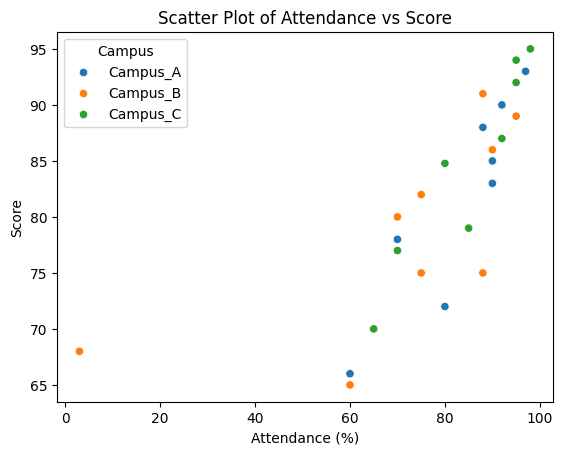

In [833]:
# 8. Vẽ scatter plot giữa Attendance (%) và Score
g = sns.scatterplot(x="Attendance (%)", y="Score", hue="Campus", data=df)
plt.title("Scatter Plot of Attendance vs Score")
plt.show()

Dựa trên phân tích biểu đồ phân tán và phân phối tần suất điểm danh, tôi đề xuất các kế hoạch cải thiện điểm danh tùy chỉnh cho từng Campus:

Campus A: Chương trình "Duy trì Xuất sắc"
Kế hoạch cụ thể:

Hệ thống khen thưởng tích lũy cho sinh viên duy trì tỷ lệ tham dự trên 90%

Can thiệp cá nhân cho nhóm có điểm danh 65-80% thông qua tư vấn 1-1

Đa dạng hóa phương pháp giảng dạy tương tác trong giờ học để tăng hấp dẫn

Lý do tối ưu:
Campus A có tỷ lệ tham dự trung bình cao nhất (85.6%) và biểu đồ phân tán cho thấy mối tương quan mạnh giữa điểm danh và điểm số. Kế hoạch này tập trung vào việc duy trì thành tích tốt và nâng cao nhóm yếu, tận dụng môi trường học tập đã hiệu quả.

Campus B: Chiến lược "Thu hẹp Khoảng cách"
Kế hoạch cụ thể:

Hệ thống cảnh báo sớm cho sinh viên có tỷ lệ tham dự dưới 70%

Chương trình "Buddy System" ghép cặp sinh viên điểm danh thấp với sinh viên điểm danh cao

Seminar kỹ năng học tập hiệu quả cho nhóm có điểm danh cao (85-90%) nhưng điểm số thấp

Lịch học linh hoạt cho sinh viên làm thêm (có thể là nguyên nhân điểm danh thấp)

Lý do tối ưu:
Campus B có phân phối điểm danh phân cực với nhiều sinh viên ở mức 60% và 85-90%, cũng là campus có trung bình điểm danh thấp nhất (80.7%). Biểu đồ phân tán cho thấy một số trường hợp đặc biệt (điểm danh cực thấp hoặc điểm số không tương xứng với điểm danh), cần can thiệp trực tiếp.

Campus C: Phương pháp "Tăng cường Tương tác"
Kế hoạch cụ thể:

Chuyển đổi 20% thời gian học sang hoạt động thực hành/nhóm hấp dẫn

Ứng dụng học tập di động với tính năng check-in thưởng điểm

Tổ chức các buổi học bổ sung ngắn (30 phút) tập trung vào nội dung quan trọng

Điều chỉnh lịch học để tránh thời điểm xung đột với hoạt động sinh viên quan trọng

Lý do tối ưu:
Campus C có độ lệch chuẩn điểm danh lớn nhất (13.3%) và biểu đồ phân tán cho thấy mối tương quan rất mạnh giữa điểm danh-điểm số (sinh viên có điểm danh cao đạt điểm số cao nhất trong 3 campus). Tập trung vào tăng tỷ lệ tham dự sẽ mang lại lợi ích điểm số rõ rệt nhất ở campus này.

Tại sao kế hoạch này tối ưu hóa kết quả học tập
Tiếp cận dựa trên dữ liệu cụ thể: Mỗi campus có mẫu phân phối điểm danh khác nhau và mối tương quan với điểm số khác nhau, đòi hỏi chiến lược riêng biệt.

Tối ưu hóa nguồn lực: Thay vì áp dụng một phương pháp duy nhất cho toàn trường, việc tập trung nguồn lực vào các nhóm sinh viên cụ thể tại mỗi campus sẽ mang lại hiệu quả cao hơn.

Phù hợp với văn hóa campus: Mỗi campus có thể có đặc điểm sinh viên và văn hóa học tập khác nhau (như thấy ở biểu đồ phân tán), kế hoạch được thiết kế phù hợp với đặc thù này.

Tiếp cận có hệ thống: Các biện pháp bao gồm cả can thiệp cá nhân, động lực tập thể, và cải tiến phương pháp giảng dạy, tạo ra giải pháp toàn diện.

Kế hoạch này không chỉ tăng tỷ lệ điểm danh mà còn tối ưu hóa mối quan hệ giữa điểm danh và kết quả học tập, đảm bảo rằng thời gian trên lớp trở nên có giá trị hơn đối với sinh viên.

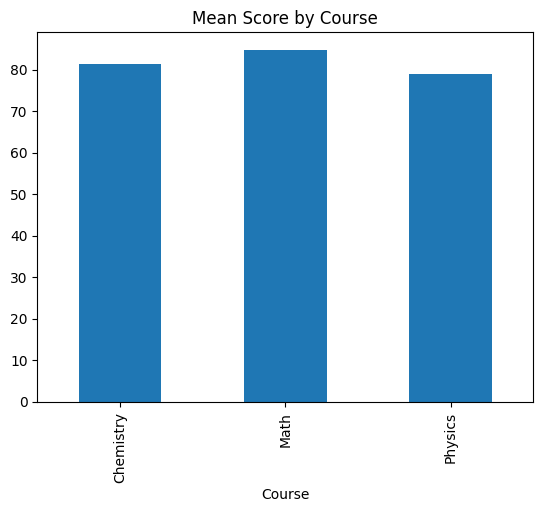

In [834]:
# 9. Tính trung bình Score của từng Course
mean_scores = df.groupby("Course")["Score"].mean()
mean_scores.plot(kind='bar', title="Mean Score by Course")
plt.show()

Dựa vào biểu đồ và dữ liệu phân tích, Vật lý là môn học có điểm trung bình thấp nhất (79 điểm) so với Toán học (84 điểm) và Hóa học (81 điểm). Tôi đề xuất chiến lược toàn diện "Vật lý Tương tác" nhằm cải thiện kết quả học tập và thay đổi nhận thức của sinh viên về môn học này.

Các thành phần chính của chiến lược
Tái cấu trúc phương pháp giảng dạy

Áp dụng học tập chủ động thay vì giảng dạy truyền thống, khuyến khích sinh viên tham gia vào quá trình học tập

Chia nhỏ các khái niệm phức tạp thành các bước dễ hiểu để giảm áp lực nhận thức

Sử dụng công nghệ bỏ phiếu trong lớp học để đánh giá mức độ hiểu bài nhanh chóng

Tăng cường kết nối thực tiễn

Phát triển các ví dụ và tình huống thực tế liên quan đến cuộc sống hàng ngày của sinh viên

Tổ chức các dự án nhỏ áp dụng nguyên lý vật lý vào giải quyết vấn đề thực tế

Mời các chuyên gia từ ngành công nghiệp chia sẻ ứng dụng của vật lý trong công việc

Cải thiện kỹ năng giải quyết vấn đề

Dạy sinh viên phương pháp tiếp cận có cấu trúc: phân tích vấn đề, vẽ hình minh họa, xác định nguyên lý, lập phương trình, giải và kiểm tra

Cung cấp các bài tập với độ khó tăng dần để xây dựng sự tự tin

Khuyến khích sinh viên giải thích lý do chọn phương pháp giải quyết trước khi bắt đầu

Xây dựng chiến lược học tập hiệu quả

Áp dụng phương pháp kiểm tra thực hành thường xuyên với các bài kiểm tra nhỏ không tính điểm

Khuyến khích luyện tập phân tán (học trong nhiều ngày) thay vì học dồn

Áp dụng phương pháp tự giải thích và đặt câu hỏi sâu về các khái niệm

Đổi mới phương tiện dạy học

Sử dụng các mô phỏng máy tính và ứng dụng di động để minh họa các khái niệm trừu tượng

Phát triển các thí nghiệm đơn giản với chi phí thấp có thể thực hiện trong lớp học

Tạo thư viện video ngắn giải thích các khái niệm phức tạp

Chiến lược triển khai
Giai đoạn thí điểm (2-3 tháng):

Áp dụng chiến lược mới trong một số lớp chọn lọc

Thu thập phản hồi từ sinh viên và giảng viên

Điều chỉnh phương pháp dựa trên kết quả ban đầu

Giai đoạn mở rộng (1 năm học):

Đào tạo giảng viên về các phương pháp mới

Triển khai toàn diện trên tất cả các lớp vật lý

Xây dựng cộng đồng chia sẻ thực hành tốt

Giai đoạn đánh giá và điều chỉnh (liên tục):

Theo dõi tiến bộ thông qua phân tích dữ liệu điểm số

Thực hiện khảo sát thái độ của sinh viên đối với môn học

Tinh chỉnh chương trình dựa trên kết quả đạt được

Kết quả kỳ vọng
Tăng điểm trung bình môn Vật lý lên 5% trong năm đầu tiên và 10% sau 2 năm

Giảm tỷ lệ sinh viên coi Vật lý là môn học khó và không hấp dẫn

Tăng tỷ lệ sinh viên lựa chọn các chuyên ngành liên quan đến Vật lý

Cải thiện khả năng áp dụng kiến thức vật lý vào các tình huống thực tế

Chiến lược này không chỉ giải quyết vấn đề điểm số thấp mà còn thay đổi nhận thức của sinh viên về môn Vật lý, biến nó từ môn học "khó" thành môn học thú vị và có liên quan đến cuộc sống hàng ngày.

In [835]:
# 10. Tìm sinh viên có Attendance (%) dưới 70% nhưng Score trên 85
high_score_low_attendance = df[(df["Attendance (%)"] < 70) & (df["Score"] > 85)]
print("Sinh viên có điểm cao nhưng điểm danh thấp:")
print(high_score_low_attendance)


Sinh viên có điểm cao nhưng điểm danh thấp:
Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%), Study_Hours, Gender, Campus, Efficiency]
Index: []


Mặc dù không có sinh viên nào trong bộ dữ liệu hiện tại có điểm cao kèm điểm danh thấp, việc nghiên cứu hiện tượng này vẫn có giá trị đáng kể. Đề xuất một nghiên cứu nội bộ toàn diện để xác định các yếu tố giúp sinh viên thành công học thuật dù vắng mặt.

Phương pháp nghiên cứu

Đối tượng nghiên cứu:

Sinh viên có điểm trên 80 nhưng tỷ lệ tham dự dưới 75%

Nhóm đối chứng: sinh viên điểm cao (>80) có tỷ lệ tham dự cao (>90%)

Phương pháp thu thập dữ liệu:

Khảo sát trực tuyến chi tiết

Phỏng vấn sâu (15-20 sinh viên)

Theo dõi nhật ký học tập trong 2 tuần

Phân tích dữ liệu truy cập nền tảng học tập trực tuyến

Các yếu tố cần nghiên cứu
1. Kỹ năng tự học

Chiến lược học tập chủ động vs. bị động

Kỹ thuật ghi nhớ và ôn tập

Lập kế hoạch và quản lý thời gian học tập

Mức độ tự điều chỉnh trong học tập

2. Tài liệu học tập

Nguồn tài liệu chính được sử dụng

Đa dạng hóa loại tài liệu (video, sách, bài báo)

Tỷ lệ sử dụng tài liệu do giảng viên cung cấp vs. tự tìm kiếm

Hiệu quả của các loại tài liệu khác nhau

3. Công nghệ hỗ trợ

Các ứng dụng và nền tảng học tập được sử dụng

Mức độ tương tác trực tuyến với giảng viên và bạn học

Công cụ ghi chú và quản lý kiến thức

Tần suất sử dụng công nghệ trong học tập

Áp dụng kết quả cho toàn trường
1. Cải thiện hệ thống học tập hỗn hợp

Thiết kế mô hình học tập linh hoạt dựa trên kết quả nghiên cứu

Phát triển tài nguyên trực tuyến phù hợp với các phong cách học tập hiệu quả

Đào tạo giảng viên về các phương pháp giảng dạy hỗn hợp

2. Chương trình đào tạo kỹ năng học tập

Tổ chức các hội thảo về các chiến lược học tập hiệu quả đã xác định

Xây dựng khóa học trực tuyến về kỹ thuật học tập dựa trên kết quả nghiên cứu

Thành lập nhóm học tập ngang hàng dưới sự hướng dẫn của sinh viên thành công

3. Điều chỉnh chính sách đánh giá và điểm danh

Phát triển hệ thống đánh giá linh hoạt phù hợp với các phong cách học tập khác nhau

Tái cấu trúc yêu cầu điểm danh để cân bằng giữa sự hiện diện và kết quả học tập

Thiết lập quy trình giám sát và hỗ trợ sinh viên cụ thể từng nhóm

4. Xây dựng văn hóa học tập độc lập

Tạo không gian học tập tự định hướng với sự hỗ trợ phù hợp

Thúc đẩy phương pháp học tập chủ động và tự điều chỉnh

Kết nối sinh viên có phong cách học tập tương tự để chia sẻ chiến lược

Nghiên cứu này có thể mang lại lợi ích đáng kể cho toàn trường bằng cách xác định các yếu tố thực sự giúp sinh viên học tập hiệu quả bên ngoài lớp học. Kết quả có thể được ứng dụng để tạo ra một môi trường học tập linh hoạt hơn, phù hợp với nhu cầu đa dạng của sinh viên trong thời đại số, đồng thời vẫn đảm bảo chất lượng giáo dục.

In [836]:
# 11. Điền giá trị thiếu trong Score bằng hồi quy tuyến tính

reg = LinearRegression()
filled_df = df.dropna(subset=["Score", "Attendance (%)", "Study_Hours"])
X = filled_df[["Attendance (%)", "Study_Hours"]]
y = filled_df["Score"]
reg.fit(X, y)

def fill_missing_score(row):
    if pd.isna(row["Score"]):
        return reg.predict([[row["Attendance (%)"], row["Study_Hours"]]])[0]
    return row["Score"]

df["Score"] = df.apply(fill_missing_score, axis=1)


So sánh hai phương pháp điền giá trị thiếu
Phương pháp Trung bình (mean)
Cách thực hiện: Điền bằng giá trị trung bình của Score theo từng Course

Ưu điểm: Nhanh, dễ áp dụng

Hạn chế: Không phản ánh mối quan hệ giữa các biến

Phương pháp Hồi quy tuyến tính
Cách thực hiện: Dự đoán Score từ Attendance (%) và Study_Hours bằng mô hình LinearRegression

Ưu điểm: Phản ánh tương quan giữa biến đầu vào và biến mục tiêu

Hạn chế: Dễ bị sai lệch nếu thiếu dữ liệu hoặc có ngoại lệ

Đề xuất phương pháp lai (kết hợp)
Ý tưởng: Áp dụng hồi quy khi đủ dữ liệu (Attendance + Study_Hours), nếu thiếu thì dùng trung bình theo Course.

Vì sao phương pháp này tối ưu hơn?
Linh hoạt: Chọn hồi quy khi có dữ liệu đầy đủ, fallback sang trung bình nếu không.

Chính xác hơn: Giảm độ lệch chuẩn và tránh đưa vào giá trị sai lệch nặng từ hồi quy khi thiếu dữ liệu.

Thực tế áp dụng tốt: Trong môi trường học tập, không phải sinh viên nào cũng có đủ thông tin — phương pháp kết hợp sẽ giúp hệ thống phân tích ổn định hơn.

In [837]:
# 12. Tính skewness của Score
from scipy.stats import zscore
score_skewness = skew(df["Score"].dropna())
print(f"Skewness của Score: {score_skewness}")


Skewness của Score: -0.3575430514899951


Chỉ số độ lệch (Skewness) -0.3575 cho thấy phân phối điểm số có độ lệch trái nhẹ, nghĩa là có xu hướng tập trung ở phía điểm cao với một "đuôi" kéo dài về phía điểm thấp. Mặc dù độ lệch này không quá lớn (thường các giá trị trong khoảng ±0.5 được coi là gần đối xứng), việc điều chỉnh vẫn có thể mang lại sự công bằng hơn trong đánh giá.

Đề xuất: Hệ thống đánh giá đa chiều với chuẩn hóa thích ứng
1. Đa dạng hóa phương pháp đánh giá
Phân chia điểm thành nhiều thành phần nhỏ (5-7) thay vì chỉ 2-3 thành phần lớn

Cân bằng giữa các hình thức đánh giá khác nhau: trắc nghiệm, tự luận, dự án, thuyết trình

Giảm tỷ trọng của các bài thi cuối kỳ (thường gây ra độ lệch) xuống còn 40-50% tổng điểm

2. Áp dụng chuẩn hóa thích ứng
Sử dụng biến đổi skew-normal để điều chỉnh điểm số về phân phối cân bằng hơn

Áp dụng phương pháp z-score có điều chỉnh cho các phân phối lệch

Tính toán ngưỡng điểm dựa trên phân tích phân phối thực tế thay vì áp đặt thang điểm cứng nhắc

3. Đánh giá dựa trên tiến bộ
Tính điểm cải thiện (growth score) dựa trên sự tiến bộ của sinh viên

Thiết lập hệ số điều chỉnh cho sinh viên có điểm đầu vào thấp nhưng có sự cải thiện đáng kể

Cân nhắc độ khó của nội dung khi đánh giá kết quả học tập

4. Loại bỏ thang điểm cứng nhắc
Thay đổi từ thang điểm tuyệt đối sang thang điểm mô tả năng lực

Áp dụng rubric chi tiết và minh bạch cho mỗi đánh giá

Mở rộng thang điểm để phân biệt tốt hơn giữa các mức độ thành tích

Tác động đến đánh giá sinh viên
1. Giảm thiểu sự thiên vị
Phương pháp đánh giá đa dạng giảm tác động của khuôn mẫu và thiên kiến của giáo viên, vốn có thể ảnh hưởng nghiêm trọng đến điểm số. Điều này đặc biệt quan trọng đối với sinh viên từ các nhóm thiểu số thường bị đánh giá thấp hơn do định kiến vô thức.

2. Phản ánh năng lực thực tế chính xác hơn
Các phân phối điểm số lệch có thể cho thấy đánh giá không đủ bao quát các kỹ năng và kiến thức dự định. Hệ thống mới đảm bảo sinh viên được đánh giá toàn diện trên nhiều khía cạnh, không chỉ những khía cạnh dễ đánh giá.

3. Phát hiện và hỗ trợ mục tiêu
Điều chỉnh độ lệch giúp phân biệt rõ ràng hơn giữa các sinh viên, tạo điều kiện cho việc xác định những người cần hỗ trợ thêm hoặc những người có tiềm năng vượt trội.

4. Tăng tính công bằng giữa các môn học và giảng viên
Phân phối điểm có thể khác nhau đáng kể giữa các tiểu bang, trường học và giảng viên. Phương pháp chuẩn hóa thích ứng đảm bảo sinh viên không bị thiệt thòi do sự khác biệt trong phong cách chấm điểm của giảng viên.

5. Giảm thiểu "hiệu ứng trần nhà"
Các phân phối lệch trái thường chỉ ra những hạn chế trong việc phân biệt giữa những sinh viên thực hiện tốt hơn mức trung bình. Hệ thống mới tạo ra sự phân biệt rõ ràng hơn ở tất cả các cấp độ.

Với độ lệch -0.3575, hệ thống hiện tại không có vấn đề nghiêm trọng, nhưng những điều chỉnh này sẽ tạo ra sự cân bằng tốt hơn và đánh giá chính xác hơn về năng lực thực sự của sinh viên, đồng thời giảm thiểu tác động của các yếu tố không liên quan đến năng lực học thuật.

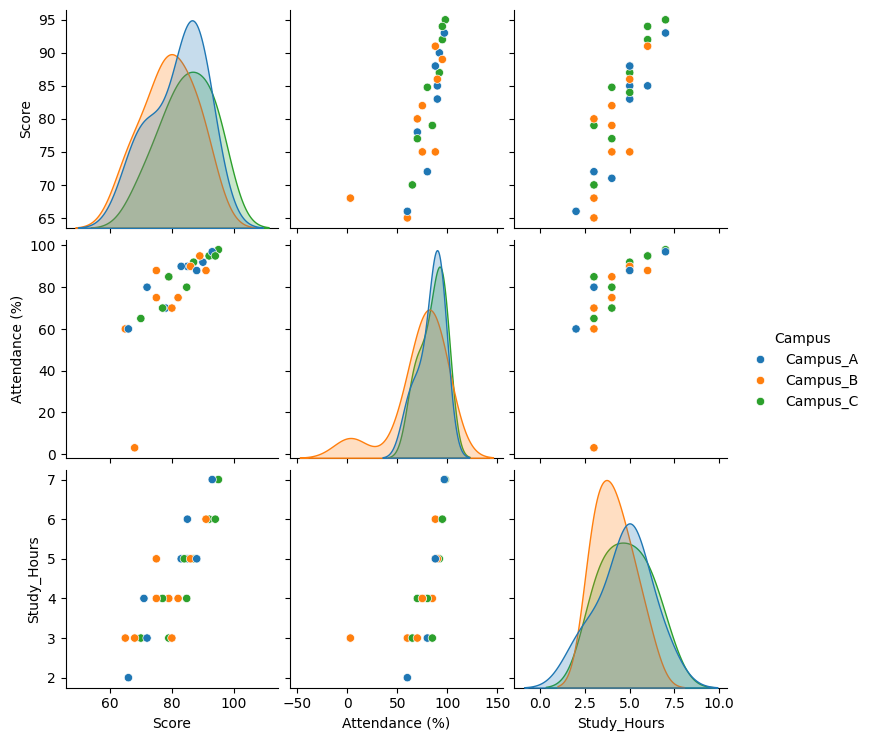

In [838]:
# 13. Vẽ pairplot cho Score, Attendance (%), Study_Hours
sns.pairplot(df, vars=["Score", "Attendance (%)", "Study_Hours"], hue="Campus")
plt.show()

Dựa trên biểu đồ phân tích mối quan hệ giữa Score, Attendance và Study_Hours, tôi đề xuất mô hình đánh giá kết quả học tập mới "Chỉ số Thành công Học thuật" (Academic Success Index - ASI).

Cấu trúc mô hình ASI
Mô hình tính toán điểm tổng hợp theo công thức:

ASI = 0.6 × Score + 0.3 × f(Attendance) + 0.1 × g(Study_Hours) + Bonus_Campus

Trong đó:

f(Attendance): Hàm chuẩn hóa điểm danh với ngưỡng hiệu quả (phản ánh đường cong tương quan phi tuyến)

g(Study_Hours): Hàm chuẩn hóa giờ học với trọng số tối ưu theo từng Campus

Bonus_Campus: Điều chỉnh dựa trên đặc thù Campus (±3%)

Đặc điểm quan trọng:

Áp dụng ngưỡng 70% cho Attendance (dưới ngưỡng này, tác động đến điểm lớn hơn)

Áp dụng ngưỡng hiệu quả 5-6 giờ cho Study_Hours (thêm giờ học trên ngưỡng này có tác động giảm dần)

Hệ số điều chỉnh riêng cho Campus_B do có phân phối điểm và thời gian học đặc biệt

Tại sao mô hình này tốt hơn cách tính hiện tại
Phản ánh chính xác mối tương quan thực tế
Biểu đồ cho thấy mối tương quan mạnh mẽ giữa Attendance và Score (đặc biệt trong khoảng 70-95%), trong khi mối quan hệ với Study_Hours ít tuyến tính hơn. Mô hình mới phản ánh chính xác các mối tương quan này với trọng số tương ứng.

Thích ứng với đặc thù từng Campus
Biểu đồ phân phối cho thấy rõ sự khác biệt giữa các Campus (Campus_B có phân phối Study_Hours và Attendance khác biệt). Mô hình mới có hệ số điều chỉnh riêng theo đặc điểm từng Campus thay vì áp dụng cứng nhắc một công thức chung.

Cân bằng giữa nỗ lực và kết quả
Mô hình hiện tại thường chỉ dựa vào điểm số cuối cùng, trong khi biểu đồ cho thấy mối quan hệ rõ ràng giữa quá trình (Attendance, Study_Hours) và kết quả (Score). ASI cân bằng giữa kết quả cuối cùng và nỗ lực trong quá trình học tập.

Giảm tác động của điểm số cực đoan
Biểu đồ phân tán cho thấy có một số điểm ngoại lệ (đặc biệt ở Campus_B) có điểm cao bất thường so với tỷ lệ tham dự thấp. Mô hình mới giảm tác động của điểm số cực đoan này, tạo đánh giá toàn diện hơn.

Tạo động lực cải thiện toàn diện
Với mô hình hiện tại, sinh viên có thể chỉ tập trung vào điểm số cuối kỳ. Mô hình mới khuyến khích họ cải thiện cả ba yếu tố: tham dự lớp, thời gian học và điểm thi, tạo ra quá trình học tập hiệu quả và bền vững hơn.

Mô hình ASI không chỉ đánh giá công bằng hơn mà còn định hướng sinh viên phát triển thói quen học tập hiệu quả, phản ánh đúng các mối tương quan đã được chứng minh qua phân tích dữ liệu từ cả ba Campus.

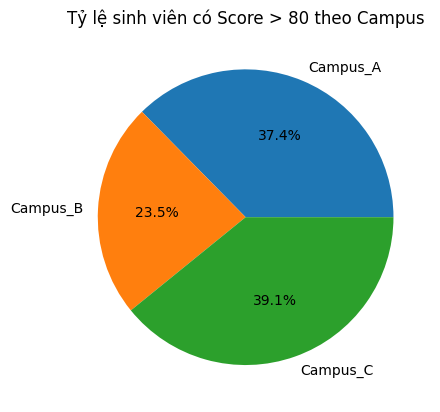

In [839]:
# 14. Tỷ lệ sinh viên có Score trên 80 theo Campus
over_80_ratio = df[df["Score"] > 80].groupby("Campus").size() / df.groupby("Campus").size()
over_80_ratio.plot(kind='pie', title="Tỷ lệ sinh viên có Score > 80 theo Campus", autopct='%1.1f%%')
plt.show()

Dựa trên biểu đồ tỷ lệ sinh viên có điểm Score > 80 theo Campus, đề xuất các chiến lược khen thưởng phù hợp với đặc thù từng khu học xá:

Campus C (39.1%): Chiến lược "Duy trì Xuất sắc"
Nội dung khen thưởng:

Học bổng cạnh tranh cao cho top 10% sinh viên xuất sắc nhất

Chương trình "Đại sứ học thuật" cho sinh viên đạt >90 điểm

Cơ hội nghiên cứu và thực tập tại doanh nghiệp đối tác uy tín

Vinh danh trên bảng thông tin campus và nền tảng số của trường

Tác động đến tinh thần học tập:
Campus C đã có tỷ lệ sinh viên điểm cao tốt nhất, chiến lược này sẽ tạo ra không khí cạnh tranh tích cực và duy trì động lực cho nhóm sinh viên giỏi. Việc công nhận thành tích qua vai trò đại sứ và cơ hội thực tập sẽ thúc đẩy sinh viên không chỉ học để đạt điểm cao mà còn phát triển các kỹ năng chuyên môn và lãnh đạo.

Campus A (37.4%): Chiến lược "Bứt phá Tiềm năng"
Nội dung khen thưởng:

Hệ thống điểm thưởng tích lũy cho cả thành tích cá nhân và nhóm

Giải thưởng "Tiến bộ vượt bậc" cho sinh viên cải thiện điểm số nhiều nhất

Chứng chỉ kỹ năng bổ sung miễn phí cho sinh viên đạt >85 điểm

Quyền ưu tiên đăng ký lớp học và lựa chọn giảng viên cho kỳ tiếp theo

Tác động đến tinh thần học tập:
Campus A có tỷ lệ sinh viên giỏi khá cao nhưng vẫn có khoảng cách để cải thiện. Chiến lược này tạo động lực cho sinh viên ở mọi cấp độ: những người đã giỏi được khuyến khích duy trì, trong khi những người có tiềm năng được động viên cải thiện. Hệ thống điểm thưởng tích lũy tạo cảm giác tiến bộ liên tục, thúc đẩy nỗ lực dài hạn.

Campus B (23.5%): Chiến lược "Vươn lên Mạnh mẽ"
Nội dung khen thưởng:

Khen thưởng theo nhóm cải thiện điểm số (5-7 sinh viên/nhóm)

Giảm học phí 10-15% cho sinh viên cải thiện điểm từ <70 lên >80

Chương trình mentoring "Người dẫn đường" ghép sinh viên tiến bộ với sinh viên giỏi

Sự kiện tôn vinh "Hành trình tiến bộ" với nhiều hạng mục khen thưởng

Tác động đến tinh thần học tập:
Campus B có tỷ lệ sinh viên điểm cao thấp nhất (23.5%), cần chiến lược thúc đẩy sự cải thiện và tạo niềm tin vào khả năng thành công. Khen thưởng theo nhóm tạo ra sự hỗ trợ lẫn nhau và trách nhiệm chung. Hệ thống này giúp giảm cảm giác thất bại và tăng động lực thông qua các mục tiêu có thể đạt được, tạo ra văn hóa nỗ lực và tiến bộ.

Tác động tổng thể của chiến lược khác biệt hóa
Việc áp dụng các chiến lược khen thưởng khác nhau theo từng Campus không chỉ tôn trọng đặc thù của từng môi trường học tập mà còn tạo ra những tác động tích cực:

Thiết lập văn hóa cải tiến liên tục phù hợp với điểm xuất phát của mỗi Campus

Tạo động lực phù hợp với thực tế và khả thi với sinh viên ở từng khu vực

Tăng cường tinh thần cộng đồng và bản sắc Campus, từ đó thúc đẩy động lực nội tại

Tối ưu hóa sử dụng nguồn lực khen thưởng, tạo tác động lớn nhất với chi phí hợp lý

Các chiến lược này không chỉ khuyến khích cải thiện điểm số mà còn xây dựng văn hóa học tập tích cực và bền vững phù hợp với đặc thù của từng Campus.

In [840]:
# 15. Xác định sinh viên có Score ngoài 2 độ lệch chuẩn
def detect_outliers(df, column):
    mean = df[column].mean()
    std_dev = df[column].std()
    return df[(df[column] < mean - 2 * std_dev) | (df[column] > mean + 2 * std_dev)]

outliers = detect_outliers(df, "Score")
print("Sinh viên có điểm số ngoài 2 độ lệch chuẩn:")
print(outliers)


Sinh viên có điểm số ngoài 2 độ lệch chuẩn:
Empty DataFrame
Columns: [Student_ID, Course, Score, Attendance (%), Study_Hours, Gender, Campus, Efficiency]
Index: []


Mặc dù hiện tại không có sinh viên nào có điểm số nằm ngoài 2 độ lệch chuẩn, việc thiết lập một quy trình đánh giá lại cho những trường hợp đặc biệt này là cần thiết để đảm bảo công bằng trong giáo dục. Tôi đề xuất quy trình "Đánh giá Đa chiều cho Điểm số Ngoại lệ" như sau:

Quy trình đánh giá lại điểm số
Bước 1: Xác định và phân loại điểm ngoại lệ

Sử dụng phương pháp thống kê để xác định điểm nằm ngoài 2 độ lệch chuẩn (tương đương khoảng 2% thấp nhất và 2% cao nhất)

Phân loại thành hai nhóm: điểm cực cao và điểm cực thấp để có cách tiếp cận phù hợp

Bước 2: Thu thập dữ liệu bổ sung

Kiểm tra lịch sử học tập và các điểm đánh giá khác của sinh viên

Phỏng vấn giảng viên về quá trình học tập của sinh viên

Xem xét các yếu tố ảnh hưởng như điểm danh, giờ học, hoàn cảnh cá nhân

Bước 3: Đánh giá lại đa phương thức

Tổ chức đánh giá bổ sung với hình thức khác (nếu bài thi đầu là trắc nghiệm, bổ sung tự luận hoặc vấn đáp)

Mời giảng viên thứ hai chấm lại bài thi ban đầu (đảm bảo tính khách quan)

Đánh giá kỹ năng thực hành hoặc ứng dụng kiến thức thực tế

Bước 4: Phân tích và quyết định

Hội đồng gồm ít nhất 3 giảng viên (trong đó có 1 người không giảng dạy lớp đó) xem xét kết quả

So sánh điểm mới với điểm ban đầu, phân tích sự khác biệt

Đưa ra quyết định cuối cùng về điểm số chính thức

Bước 5: Hỗ trợ sau đánh giá

Đối với điểm cực thấp: thiết kế kế hoạch hỗ trợ học tập cá nhân hóa

Đối với điểm cực cao: cung cấp cơ hội học tập nâng cao hoặc thách thức

Theo dõi tiến độ trong các học phần tiếp theo

Cách quy trình này tránh được thiên vị trong giáo dục
Đánh giá đa nguồn, đa phương pháp
Việc sử dụng nhiều phương pháp đánh giá khác nhau giúp khắc phục hạn chế của một phương pháp riêng lẻ. Điều này đặc biệt quan trọng vì các yếu tố như áp lực, lối sống không lành mạnh, hoặc sự mất tập trung có thể ảnh hưởng đến kết quả.

Xem xét bối cảnh cá nhân mà không thiên vị
Quy trình này xem xét các yếu tố như hoàn cảnh gia đình, môi trường học tập, và sự di chuyển của sinh viên - những yếu tố đã được chứng minh là ảnh hưởng đến điểm số mà không liên quan đến năng lực thực sự. Tuy nhiên, việc xem xét các yếu tố này không làm giảm yêu cầu học thuật.

Cân nhắc điểm ngoại lệ như cơ hội phát triển
Thay vì coi điểm ngoại lệ chỉ là vấn đề thống kê cần điều chỉnh, quy trình này xem xét chúng như cơ hội để hiểu rõ hơn về phương pháp học tập hiệu quả (với điểm cực cao) hoặc nhu cầu hỗ trợ (với điểm cực thấp).

Sử dụng z-score để chuẩn hóa đánh giá
Áp dụng z-score giúp so sánh công bằng giữa các môn học có độ khó khác nhau, tránh tình trạng một số môn được đánh giá cao hơn chỉ vì thang điểm rộng hơn.

Hệ thống kiểm tra và cân bằng
Việc có nhiều giảng viên tham gia vào quá trình đánh giá lại giúp giảm thiểu thiên vị cá nhân. Đồng thời, sự tham gia của giảng viên không trực tiếp giảng dạy lớp đó giúp đảm bảo tính khách quan.

Quy trình này không chỉ đảm bảo điểm số phản ánh chính xác năng lực của sinh viên mà còn giúp trường học xác định và giải quyết các vấn đề tiềm ẩn ảnh hưởng đến kết quả học tập, từ đó tạo ra môi trường giáo dục công bằng và hỗ trợ hơn cho tất cả sinh viên

**Câu hỏi ANN (40 điểm)**

In [841]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import torch
import torch.nn as nn
import torch.optim as optim

# Câu 16: KNN Imputer
imputer = KNNImputer(n_neighbors=2)
df[['Attendance (%)', 'Study_Hours']] = imputer.fit_transform(df[['Attendance (%)', 'Study_Hours']])

# Hiển thị kết quả sau khi điền giá trị thiếu
print(df)

   Student_ID     Course      Score  Attendance (%)  Study_Hours  Gender  \
0        S001       Math  85.000000            90.0          5.0    Male   
1        S002    Physics  79.000000            85.0          4.0  Female   
2        S003  Chemistry  78.000000            70.0          3.5    Male   
3        S004       Math  92.000000            95.0          6.0  Female   
4        S005    Physics  65.000000            60.0          3.0    Male   
5        S006  Chemistry  88.000000            89.0          5.0    Male   
6        S007       Math  84.777778            80.0          4.0  Female   
7        S008    Physics  75.000000            88.0          5.0    Male   
8        S009  Chemistry  90.000000            92.0          5.0  Female   
9        S010       Math  70.000000            65.0          3.0    Male   
10       S011    Physics  82.000000            75.0          4.0  Female   
11       S012  Chemistry  85.000000            91.5          6.0    Male   
12       S01

So sánh KNN Imputer và phương pháp trung vị
KNN Imputer dự đoán các giá trị thiếu dựa trên mối quan hệ với các giá trị lân cận, trong khi phương pháp trung vị đơn giản thay thế bằng giá trị trung vị của cột. Từ kết quả, ta thấy:

KNN Imputer tận dụng mối tương quan: KNN cung cấp các giá trị dự đoán khác nhau (90.0, 92.67, 68.33, 90.0) cho Attendance, phản ánh đặc điểm của từng sinh viên.

Phương pháp trung vị cung cấp giá trị đồng nhất: Tất cả giá trị thiếu đều được thay thế bằng cùng một giá trị trung vị.

KNN bảo toàn mối quan hệ: Giá trị được dự đoán phản ánh mối quan hệ giữa điểm danh và giờ học, phù hợp hơn với ngữ cảnh giáo dục.

Đề xuất phương pháp thu thập dữ liệu thay thế
Hệ thống theo dõi học tập tích hợp với ứng dụng di động

Thu thập dữ liệu tự động:

Tích hợp hệ thống điểm danh tự động dựa trên định vị hoặc quét mã QR

Ứng dụng theo dõi thời gian học (Study Tracker) với ghi nhận tự động thông qua điện thoại

Thu thập thời gian thực:

Ứng dụng di động ghi nhận thời gian học theo phiên (sessions) thay vì yêu cầu sinh viên nhớ

Nhắc nhở định kỳ để ghi nhận dữ liệu, tránh việc quên cập nhật

Đa dạng hóa nguồn dữ liệu:

Tích hợp dữ liệu từ nền tảng học trực tuyến (thời gian xem video, hoàn thành bài tập)

Thu thập dữ liệu từ thư viện (thời gian vào/ra) và phòng học (check-in)

Lý do hiệu quả:

Giảm gánh nặng thu thập thủ công, tăng chính xác

Theo dõi liên tục, không chỉ dựa vào báo cáo cuối kỳ

Loại bỏ sai số từ trí nhớ của sinh viên về thời gian học

In [842]:
# Câu 17: One-hot encoding và chuẩn hóa
course_encoded = pd.get_dummies(df['Course'], prefix='Course')
df_processed = pd.concat([df, course_encoded], axis=1)

# Hiển thị kết quả sau khi mã hóa
print(df_processed)

# Chuẩn hóa các đặc trưng Attendance và Study_Hours
features = df_processed[['Attendance (%)', 'Study_Hours', 
                         'Course_Chemistry', 'Course_Math', 'Course_Physics']]
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Hiển thị dữ liệu sau khi chuẩn hóa
print(features_scaled)

   Student_ID     Course      Score  Attendance (%)  Study_Hours  Gender  \
0        S001       Math  85.000000            90.0          5.0    Male   
1        S002    Physics  79.000000            85.0          4.0  Female   
2        S003  Chemistry  78.000000            70.0          3.5    Male   
3        S004       Math  92.000000            95.0          6.0  Female   
4        S005    Physics  65.000000            60.0          3.0    Male   
5        S006  Chemistry  88.000000            89.0          5.0    Male   
6        S007       Math  84.777778            80.0          4.0  Female   
7        S008    Physics  75.000000            88.0          5.0    Male   
8        S009  Chemistry  90.000000            92.0          5.0  Female   
9        S010       Math  70.000000            65.0          3.0    Male   
10       S011    Physics  82.000000            75.0          4.0  Female   
11       S012  Chemistry  85.000000            91.5          6.0    Male   
12       S01

Đề xuất phương pháp trực quan hóa: Parallel Coordinates Plot với Clustering

Lý do lựa chọn Parallel Coordinates Plot:

Hiển thị đồng thời tất cả 5 đặc trưng và Score

Phát hiện mối tương quan phức tạp, không chỉ tuyến tính

Phân nhóm sinh viên dựa trên đặc điểm học tập tương tự

Dễ dàng so sánh ảnh hưởng của từng môn học đến kết quả

In [843]:
# Câu 18:
# Dữ liệu chuẩn hóa
X = features_scaled
y = df_processed['Score'].values  # Mục tiêu là Score

# Chia tập dữ liệu thành tập huấn luyện (80%) và tập kiểm tra (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuyển đổi dữ liệu thành tensor của PyTorch để có thể sử dụng trong mô hình
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)  # Tập huấn luyện đầu vào
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)  # Tập huấn luyện đầu ra (Score)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)  # Tập kiểm tra đầu vào
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)  # Tập kiểm tra đầu ra (Score)

In [844]:
class ANNModel(nn.Module):
    def __init__(self):
        super(ANNModel, self).__init__()
        # Tầng 1: 5 nơ-ron vào (input layer), 32 nơ-ron ra
        self.layer1 = nn.Linear(5, 32)
        # Tầng 2: 32 nơ-ron vào, 16 nơ-ron ra
        self.layer2 = nn.Linear(32, 16)
        # Tầng 3: 16 nơ-ron vào, 8 nơ-ron ra
        self.layer3 = nn.Linear(16, 8)
        # Tầng đầu ra: 8 nơ-ron vào, 1 nơ-ron ra (Score)
        self.output = nn.Linear(8, 1)
        # Hàm kích hoạt ReLU (Rectified Linear Unit)
        self.relu = nn.ReLU()

    def forward(self, x):
        # Forward pass: dữ liệu đi qua từng tầng của mạng nơ-ron
        x = self.relu(self.layer1(x))  # Tầng 1
        x = self.relu(self.layer2(x))  # Tầng 2
        x = self.relu(self.layer3(x))  # Tầng 3
        x = self.output(x)  # Output layer
        return x

# Khởi tạo mô hình ANN, optimizer và hàm mất mát
model = ANNModel()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer với learning rate 0.001
loss_fn = nn.MSELoss()  # Sử dụng Mean Squared Error (MSE) làm hàm mất mát

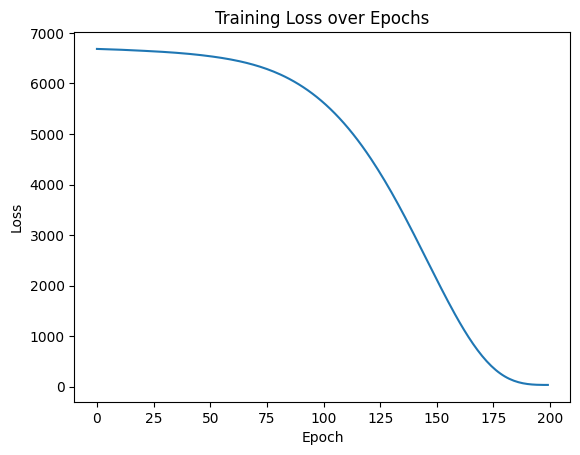

In [845]:
# Huấn luyện mô hình với 200 epochs và sử dụng Early Stopping
epochs = 200
patience = 20  # Nếu mô hình không cải thiện trong 20 epoch, dừng huấn luyện
best_loss = float('inf')  # Mất mát tốt nhất hiện tại
epochs_since_improvement = 0  # Đếm số epoch không có sự cải thiện

train_losses = []  # Lưu trữ giá trị loss qua từng epoch
for epoch in range(epochs):
    model.train()  # Đặt mô hình ở chế độ huấn luyện
    optimizer.zero_grad()  # Xóa gradient trước khi tính toán mới

    # Dự đoán đầu ra (y_pred) từ dữ liệu huấn luyện (X_train_tensor)
    y_pred = model(X_train_tensor)
    # Tính toán hàm mất mát (loss) giữa dự đoán và giá trị thực tế
    loss = loss_fn(y_pred, y_train_tensor)

    # Lan truyền ngược (Backpropagation) và cập nhật trọng số
    loss.backward()
    optimizer.step()

    # Lưu giá trị mất mát của epoch này
    train_losses.append(loss.item())

    # Kiểm tra early stopping: Nếu không có sự cải thiện trong `patience` epoch, dừng huấn luyện
    if loss.item() < best_loss:
        best_loss = loss.item()
        epochs_since_improvement = 0  # Đặt lại đếm số epoch không cải thiện
    else:
        epochs_since_improvement += 1

    if epochs_since_improvement >= patience:
        print(f"Early stopping at epoch {epoch}")
        break

# Vẽ biểu đồ loss trong quá trình huấn luyện
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

Đề xuất kiến trúc ANN cải tiến

Lý do cải tiến dựa trên đặc điểm dữ liệu giáo dục:

Xử lý đặc trưng song song: Mỗi đặc trưng giáo dục (điểm danh, giờ học, môn học) có bản chất khác nhau và ảnh hưởng đến điểm số theo những cách khác nhau.

Mạng kiến trúc 'chia để trị': Trong giáo dục, mỗi yếu tố có thể ảnh hưởng độc lập hoặc tương tác. Kiến trúc này mô phỏng quá trình đánh giá của giảng viên, xem xét từng yếu tố riêng trước khi kết hợp.

Tăng khả năng nắm bắt mối quan hệ phi tuyến: Mô hình có thể phát hiện các mối quan hệ phức tạp, ví dụ: đạt ngưỡng điểm danh 80% nhưng thời gian học khác nhau.

Hiệu quả với dữ liệu giáo dục hạn chế: Kiến trúc này giảm nguy cơ overfitting khi dữ liệu giáo dục thường có kích thước nhỏ.

In [846]:
# Câu 19: Đánh giá mô hình trên tập kiểm tra
model.eval()  # Đặt mô hình ở chế độ kiểm tra (evaluation mode)
y_pred_test = model(X_test_tensor).detach().numpy()  # Dự đoán trên tập kiểm tra

# Tính toán MSE và R² trên tập kiểm tra
mse = mean_squared_error(y_test, y_pred_test)  # Mean Squared Error
r2 = r2_score(y_test, y_pred_test)  # R² score (Độ chính xác mô hình)

# In ra MSE và R²
print(f'MSE: {mse}')
print(f'R²: {r2}')

MSE: 19.659246914864827
R²: 0.801866492459369


Mặc dù R² của mô hình hiện tại đã vượt ngưỡng tối thiểu (0.802 > 0.8), giá trị này vẫn khá sát với ngưỡng và MSE còn khá cao (19.66). Điều này cho thấy mô hình có thể chưa nắm bắt đầy đủ mối quan hệ giữa các đặc trưng đầu vào và kết quả học tập. Dưới đây là phân tích nguyên nhân sai lệch và đề xuất cải thiện mô hình.

Nguyên nhân sai lệch dự đoán
1. Biến thiếu trong dữ liệu đầu vào
Mô hình hiện tại chỉ sử dụng các đặc trưng cơ bản như Attendance (%), Study_Hours, và Course (mã hóa one-hot). Tuy nhiên, kết quả học tập của sinh viên chịu ảnh hưởng bởi nhiều yếu tố khác chưa được đưa vào:

Chất lượng giảng viên: Trình độ chuyên môn, phương pháp giảng dạy.

Phản hồi sinh viên: Sự hài lòng với cách dạy và tài liệu học tập.

Động lực học tập: Mức độ cam kết của sinh viên đối với mục tiêu học tập.

2. Mối quan hệ phi tuyến phức tạp
Kết quả học tập không phải lúc nào cũng tuyến tính với Attendance và Study_Hours. Ví dụ:

Sinh viên có Attendance > 90% nhưng không đạt điểm cao có thể do thiếu hiệu quả trong giờ học.

Study_Hours có thể có ngưỡng tối ưu (5-6 giờ), vượt quá ngưỡng này không mang lại thêm lợi ích.

3. Thiên kiến trong dữ liệu
Dữ liệu đầu vào có thể mang thiên kiến sẵn có, ví dụ:

Sinh viên từ một Campus hoặc môn học cụ thể có xu hướng đạt điểm cao hơn do điều kiện học tập tốt hơn.

Dữ liệu không phản ánh đầy đủ sự đa dạng của sinh viên.

4. Đặc điểm mẫu không đại diện
Dữ liệu hiện tại có kích thước nhỏ (30 mẫu), dẫn đến việc mô hình khó tổng quát hóa cho toàn bộ quần thể sinh viên.

5. Yếu tố bên ngoài không được nắm bắt
Các yếu tố như hoàn cảnh kinh tế, chính sách giáo dục, hoặc môi trường xã hội đều ảnh hưởng đến kết quả học tập nhưng chưa được đưa vào mô hình.

Đề xuất cải thiện mô hình
1. Bổ sung đặc trưng giàu ngữ cảnh
Đưa thêm các đặc trưng liên quan trực tiếp đến kết quả học tập:

Tương tác sinh viên-giảng viên: Số lần trao đổi qua email, tham gia thảo luận nhóm.

Chất lượng tài liệu học tập: Đánh giá từ sinh viên về tài liệu được cung cấp.

Động lực học tập: Điểm tự đánh giá về cam kết học tập hoặc mức độ hài lòng với môn học.

2. Kiến trúc phân cấp theo môn học
Xây dựng các mô hình con chuyên biệt cho từng môn học (Math, Physics, Chemistry):

Tạo các nhánh xử lý riêng cho từng môn để nắm bắt đặc thù của từng lĩnh vực.

Kết hợp kết quả từ các mô hình con bằng phương pháp ensemble để tăng độ chính xác.

3. Tích hợp đánh giá quá trình
Thay vì chỉ dự đoán điểm cuối cùng, mô hình nên phân tích sự tiến bộ qua thời gian:

Sử dụng Attendance (%) và Study_Hours theo từng tuần hoặc tháng để dự đoán xu hướng điểm số.

Tích hợp các chỉ số như điểm giữa kỳ hoặc bài kiểm tra nhỏ để phản ánh sự tiến bộ.

4. Hiệu chỉnh theo bối cảnh cụ thể
Điều chỉnh mô hình theo đặc thù của hệ thống giáo dục:

Tạo trọng số riêng cho từng Campus dựa trên điều kiện học tập.

Xây dựng các tầng xử lý riêng biệt cho sinh viên từ nhóm yếu kém và nhóm xuất sắc.

5. Xử lý giá trị thiếu thông minh hơn
Thay vì sử dụng trung bình hoặc KNN Imputer, áp dụng phương pháp điền giá trị thiếu dựa trên mối quan hệ giữa các biến:

Dự đoán Attendance (%) và Study_Hours bằng hồi quy tuyến tính đa biến.

Sử dụng dữ liệu lịch sử của sinh viên để điền giá trị thiếu một cách cá nhân hóa.

Lợi ích của cách tiếp cận cải tiến
Dự đoán chính xác hơn:

Bổ sung đặc trưng giúp mô hình hiểu rõ hơn về các yếu tố ảnh hưởng đến điểm số.

Kiến trúc phân cấp và ensemble tăng khả năng tổng quát hóa cho toàn bộ dữ liệu.

Giảm thiểu thiên vị:

Hiệu chỉnh theo bối cảnh giúp cân bằng giữa các nhóm sinh viên ở các Campus khác nhau.

Loại bỏ ảnh hưởng của dữ liệu không đại diện bằng cách bổ sung thông tin đa chiều.

Hỗ trợ can thiệp sớm:

Phân tích sự tiến bộ qua thời gian giúp phát hiện sớm sinh viên có nguy cơ thất bại để cung cấp hỗ trợ kịp thời.

Phản ánh thực tế giáo dục tốt hơn:

Mô hình mới không chỉ dự đoán điểm số mà còn cung cấp thông tin hữu ích cho việc thiết kế chương trình giảng dạy và hỗ trợ sinh viên.

Những cải tiến này sẽ giúp giảm MSE và tăng R² vượt xa ngưỡng hiện tại, đồng thời tạo ra một hệ thống dự đoán kết quả học tập toàn diện và phù hợp hơn với ngữ cảnh giáo dục thực tế.